# PCA 


Чтобы понять геометрический смысл главных компонент, рассмотрим в качестве примера выборку из двухмерного нормального распределения с явно выраженным "главным" направлением. Выделим в ней главные компоненты и посмотрим, какую долю дисперсии объясняет каждая из них.

In [18]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Доля дисперсии, объясняемая каждым компонентом:
1-ая компонента - 0.94,
2-ая компонента - 0.06

Направления основных компонент:
1-ая компонента: [-0.57532172  0.81792721] 
2-ая компонента: [-0.81792721 -0.57532172]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


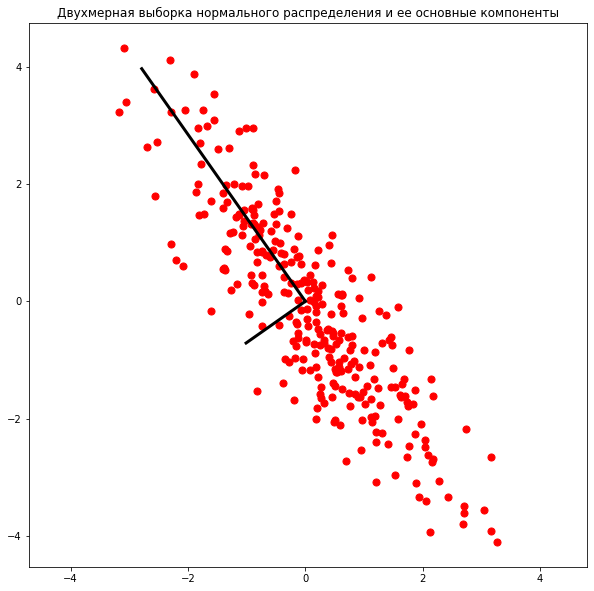

In [20]:
np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])
X = np.random.multivariate_normal(mean, cov, 300)

pca = PCA()
pca.fit(X)
print('Доля дисперсии, объясняемая каждым компонентом:\n' +\
      '1-ая компонента - %.2f,\n2-ая компонента - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Направления основных компонент:\n' +\
      '1-ая компонента:', pca.components_[0],
      '\n2-ая компонента:', pca.components_[1])

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('Двухмерная выборка нормального распределения и ее основные компоненты')
plt.show()

Первая главная компонента (ей соответствует более длинный вектор) объясняет более 90% дисперсии исходных данных. Это говорит о том, что она содержит в себе почти всю информацию о расположении выборки в пространстве, и вторая компонента может быть опущена. Спроецируем данные на первую компоненту.

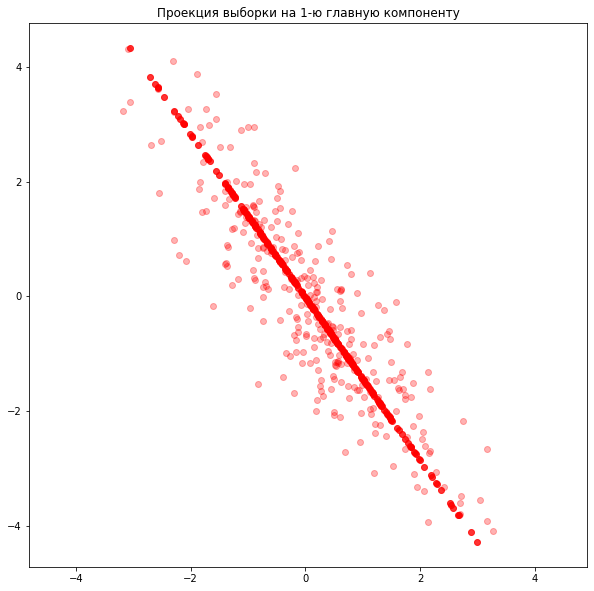

In [21]:
# Сохранение достаточного числа компонент, для объяснения более 90% дисперсий
pca = PCA(0.90)
X_reduced = pca.fit_transform(X)

# Сопоставление сокращенных данных с исходным пространством функций
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Проекция выборки на 1-ю главную компоненту')
plt.show()

Мы понизили размерность данных вдвое, при этом сохранив наиболее значимые черты. В этом заключается основной принцип понижения размерности – приблизить многомерный набор данных с помощью данных меньшей размерности, сохранив при этом как можно больше информации об исходных данных.

# Снижение размерности данных с помощью PCA

Рассмотрим метод главных компонент для визуализации данных из набора изображений рукописных цифр и дальнейшего снижения размерности данных для их сжатия. Проверим, как влияет число отбираемых главных компонент (на которые осуществляется проекция) на качество восстановления исходного изображения.

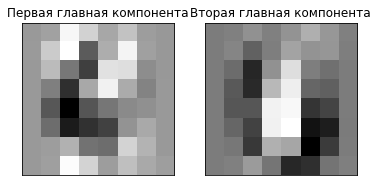

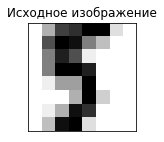

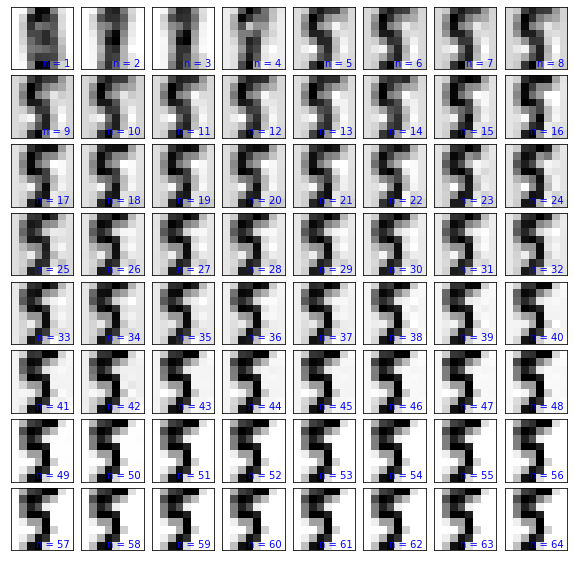

In [12]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im = pca.components_[0]
ax1.imshow(im.reshape((8, 8)), cmap='binary')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Первая главная компонента')

im = pca.components_[1]
ax2.imshow(im.reshape((8, 8)), cmap='binary')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Вторая главная компонента')
plt.show()

plt.figure(figsize=(4,2))
plt.imshow(X[15].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Исходное изображение')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[15].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='blue')
    ax.set_xticks([])
    ax.set_yticks([])


Для того чтобы понять, какое число главных компонент достаточно оставить, рассмотрим следующий график, выражающий зависимость общей доли объясняемой дисперсии от числа главных компонент.

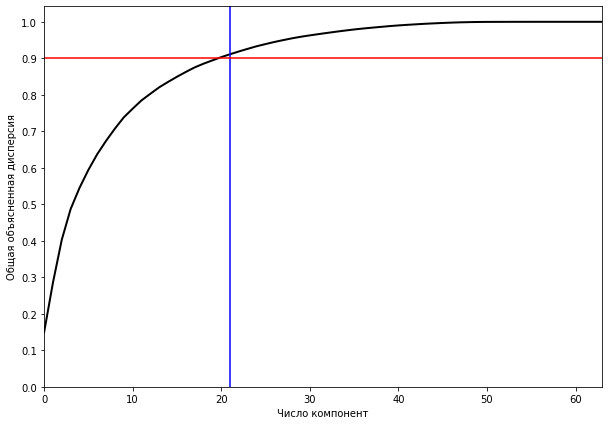

21 - данное количество компонент понадобится для объяснения 90% дисперсий


In [17]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Число компонент')
plt.ylabel('Общая объясненная дисперсия')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

pca = PCA(0.9).fit(X)
print('%d - данное количество компонент понадобится для объяснения 90%% дисперсий' 
      % pca.n_components_)